In [2]:
!pip install micrograd

In [3]:
from micrograd.engine import Value
import numpy as np
import pandas as pd

data=pd.read_csv('/content/drive/MyDrive/CO2/well.csv',sep=';')
data= data.head(10)

fpress=data['FPRESS']*0.00689476
ftemp=(data['FTEMP']-32)*5/9
rhob_log = data['RHOB']
nphi_log = data['NPHI']
dt_log = data['DT']
rho_co2 = 0.4649*np.log(fpress/ftemp)+1.217
dt_co2 = (-3.05374*fpress+849.2321)*np.exp((0.001046*fpress-0.0316190)*ftemp)

vol_qtz=[]
vol_clay=[]
vol_hc=[]
vol_co2=[]
rho_predict=[]
nphi_predict=[]
dt_predict=[]

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

for i in range(len(rhob_log)):
  mtx = [[2.71,2.85,0.8,rho_co2[i]],  #rhob
       [0.05,0.3,0.45,0],  #nphi
       [55,115,0,dt_co2[i]],  #dt
       [1,1,1,1]]  #unity
  log = [[rhob_log[i]],[nphi_log[i]],[dt_log[i]],[1]]
  mtx_inv=np.linalg.inv(mtx)
  prop = np.matmul(mtx_inv,log)
  print('mtx',mtx_inv)
  prop = softmax(prop)
  print(prop)
  #break;
  proportion = prop[:,-1]#[0.4,0.2,0.1,0.3]
  print(proportion)
  # rho_min = [Value(mtx[0][0]),Value(mtx[0][1]),Value(mtx[0][2]),Value(mtx[0][3])]
  # rho_pred = proportion[0]*rho_min[0]+proportion[1]*rho_min[1]+proportion[2]*rho_min[2]+proportion[3]*rho_min[3]
  d_delta=5
  delta_rhob=1
  delta_nphi=1
  delta_dt=100
  while np.abs(delta_rhob)>0.005:
    delta2_rhob=delta_rhob
    rho_min = [Value(mtx[0][0]),Value(mtx[0][1]),Value(mtx[0][2]),Value(mtx[0][3])]
    rho_pred = proportion[0]*rho_min[0]+proportion[1]*rho_min[1]+proportion[2]*rho_min[2]+proportion[3]*rho_min[3]
    # nphi_min = [Value(mtx[1][0]),Value(mtx[1][1]),Value(mtx[1][2]),Value(mtx[1][3])]
    # nphi_pred = proportion[0]*nphi_min[0]+proportion[1]*nphi_min[1]+proportion[2]*nphi_min[2]+proportion[3]*nphi_min[3]
    # dt_min = [Value(mtx[2][0]),Value(mtx[2][1]),Value(mtx[2][2]),Value(mtx[2][3])]
    # dt_pred = proportion[0]*dt_min[0]+proportion[1]*dt_min[1]+proportion[2]*dt_min[2]+proportion[3]*dt_min[3]
    print(f'{rho_pred.data:.4f}')
    # print(f'{nphi_pred.data:.4f}')
    # print(f'{dt_pred.data:.4f}')
    rho_pred.backward()
    # nphi_pred.backward()
    # dt_pred.backward()
    lr = 0.001
    delta_rhob = np.abs((rhob_log[i]- rho_pred.data))
    d_delta=delta2_rhob-delta_rhob
    print ('delta=',delta_rhob)
    error_rhob = np.dot((rhob_log[i]-rho_pred.data),[rho_min[0].grad,rho_min[1].grad,rho_min[2].grad,rho_min[3].grad])
    # error_nphi = np.dot((nphi_log[i]-nphi_pred.data),[nphi_min[0].grad,nphi_min[1].grad,nphi_min[2].grad,nphi_min[3].grad])
    # error_dt = np.dot((dt_log[i]-dt_pred.data),[dt_min[0].grad,dt_min[1].grad,dt_min[2].grad,dt_min[3].grad])
    print('error=',error_rhob)
    proportion = proportion + lr * error_rhob * [rho_min[0].data,rho_min[1].data,rho_min[2].data,rho_min[3].data] 
    # proportion = proportion + lr * error_nphi * [nphi_min[0].data,nphi_min[1].data,nphi_min[2].data,nphi_min[3].data]
    # proportion = proportion + lr * error_dt*[dt_min[0].data,dt_min[1].data,dt_min[2].data,dt_min[3].data]
    print(proportion)
    #proportion = softmax(np.dot(proportion,100))
  vol_qtz.append(proportion[0])
  vol_clay.append(proportion[1])
  vol_hc.append(proportion[2])
  vol_co2.append(proportion[3])
  rho_predict.append(rho_pred.data)
  # nphi_predict.append(nphi_pred.data)
  # dt_predict.append(dt_pred.data)

data['VOL_QTZ']=vol_qtz
data['VOL_CLAY']=vol_clay
data['VOL_HC']=vol_hc
data['VOL_CO2']=vol_co2
data['RHO_PRED']=rho_predict
# data['NPHI_PRED']=nphi_predict
# data['DT_PRED']=dt_predict

Streaming output truncated to the last 5000 lines.
2.3087
delta= 0.029623735420853947
error= [0.00098278 0.02110907 0.0046479  0.00315239]
[0.03317818 0.71263297 0.15690147 0.1064162 ]
2.3089
delta= 0.029441000063122225
error= [0.0009768  0.02098063 0.00461934 0.003133  ]
[0.03318083 0.71269277 0.15690517 0.10641804]
2.3090
delta= 0.029259376865557574
error= [0.00097085 0.02085295 0.00459095 0.00311373]
[0.03318346 0.7127522  0.15690884 0.10641987]
2.3092
delta= 0.029078859244476618
error= [0.00096494 0.02072602 0.00456273 0.00309457]
[0.03318607 0.71281127 0.15691249 0.10642168]
2.3094
delta= 0.028899440652891517
error= [0.00095906 0.02059985 0.00453468 0.00307553]
[0.03318867 0.71286998 0.15691612 0.10642349]
2.3096
delta= 0.02872111458033544
error= [0.00095322 0.02047442 0.00450681 0.0030566 ]
[0.03319126 0.71292833 0.15691972 0.10642528]
2.3098
delta= 0.028543874552684034
error= [0.00094741 0.02034974 0.0044791  0.00303779]
[0.03319382 0.71298632 0.15692331 0.10642706]
2.3099
delta

In [147]:
data.to_csv('result.csv')

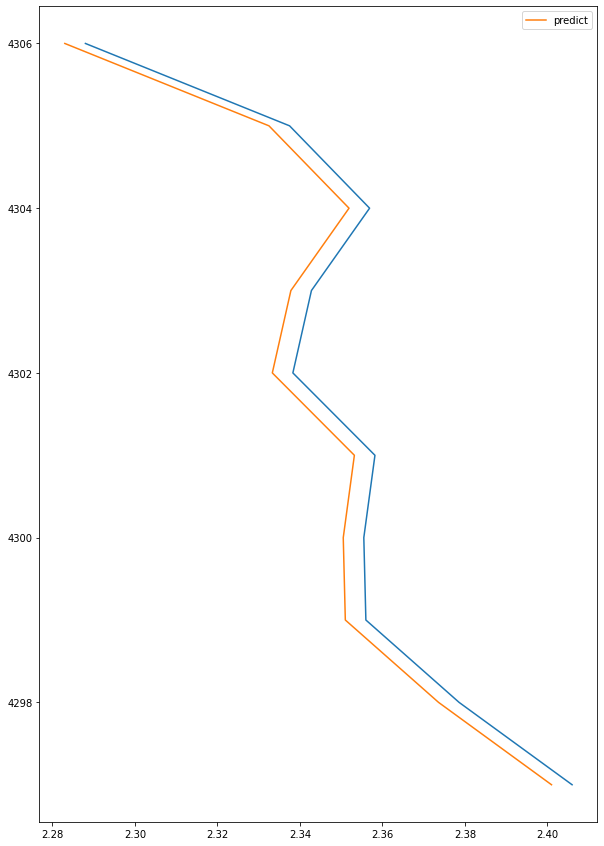

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 15))
plt.plot(data['RHOB'], data['SOURCE_REF'])
plt.plot(data['RHO_PRED'], data['SOURCE_REF'],label='predict')
plt.legend()

In [ ]:
plt.figure(figsize=(10, 15))
plt.plot(data['NPHI'], data['SOURCE_REF'])
plt.plot(data['NPHI_PRED'], data['SOURCE_REF'],label='predict')
plt.legend()

In [ ]:
plt.figure(figsize=(10, 15))
plt.plot(data['DT'], data['SOURCE_REF'])
plt.plot(data['DT_PRED'], data['SOURCE_REF'],label='predict')
plt.legend()

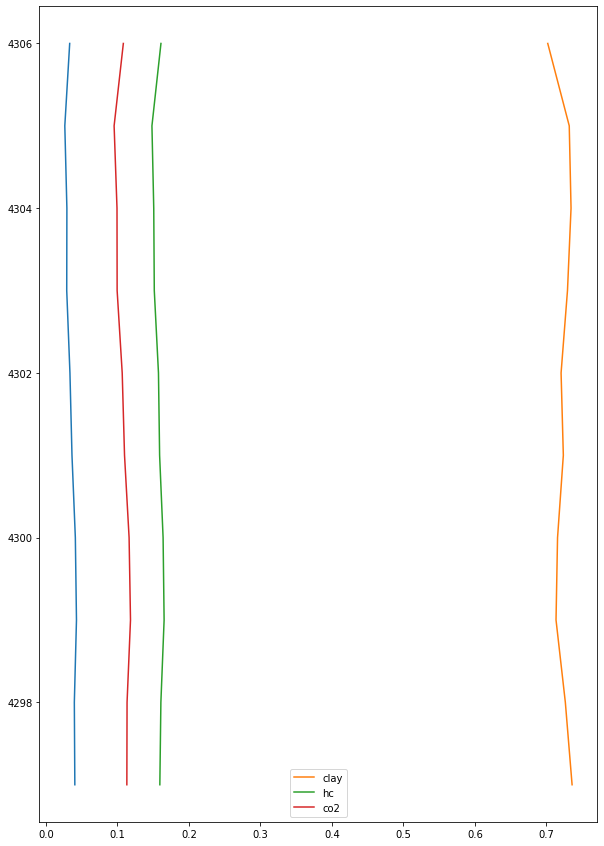

In [5]:
plt.figure(figsize=(10, 15))
plt.plot(data['VOL_QTZ'], data['SOURCE_REF'])
plt.plot(data['VOL_CLAY'], data['SOURCE_REF'],label='clay')
plt.plot(data['VOL_HC'], data['SOURCE_REF'],label='hc')
plt.plot(data['VOL_CO2'], data['SOURCE_REF'],label='co2')
plt.legend()